<a href="https://colab.research.google.com/github/NityaSG/RIL_stock_price_prediction_LSTM/blob/main/RIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Stock Market price prediction using LSTM
### on reliance industries (RIL) NSE data.

Nitya Singh

nityasingh030301@gmail.com
 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving RELIANCE.csv to RELIANCE.csv


## Importing data set 
The dimension of the the training_set is reduced to hold only 'Open' column of the data set

In [3]:
train = pd.read_csv('RELIANCE.csv')
#keras only takes numpy array
training_set = train.iloc[:, 1: 2].values

### Scaling down the data to a value in [0,1]

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating training set and target set.
Training set contains 60 days of data 
Target data is the trading day after the 60 days

In [5]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Defining the model

In [7]:

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
35/35 [==============================] - 12s 120ms/step - loss: 0.0442
Epoch 2/80
35/35 [==============================] - 4s 116ms/step - loss: 0.0075
Epoch 3/80
35/35 [==============================] - 4s 115ms/step - loss: 0.0063
Epoch 4/80
35/35 [==============================] - 4s 112ms/step - loss: 0.0061
Epoch 5/80
35/35 [==============================] - 4s 123ms/step - loss: 0.0057
Epoch 6/80
35/35 [==============================] - 4s 115ms/step - loss: 0.0057
Epoch 7/80
35/35 [==============================] - 4s 114ms/step - loss: 0.0054
Epoch 8/80
35/35 [==============================] - 4s 117ms/step - loss: 0.0048
Epoch 9/80
35/35 [==============================] - 4s 116ms/step - loss: 0.0052
Epoch 10/80
35/35 [==============================] - 4s 113ms/step - loss: 0.0051
Epoch 11/80
35/35 [==============================] - 4s 115ms/step - loss: 0.0044
Epoch 12/80
35/35 [==============================] - 4s 113ms/step - loss: 0.0051
Epoch 13/80
35/35 [=====

### Uploading the test data 
Last 60 days values of the stock on which the model was not trained.

The values are sequential to the training dataset.

In [8]:
uploadd = files.upload()

Saving test.csv to test.csv


In [9]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Prediction on test data
Since we use 60 previous trading days data for prediction. For predicting the first data in the testing set the last 60 days of the training data is used. Hence, in this way a sliding window is created and a prediction for each day in testing duration is predicted.

An extra day was added in the end for cross checking with the value on the day of this experiment being done (22nd December 2022).

In [33]:
dataset_total = pd.concat((train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,len(inputs)+1):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 0s 37ms/step


### Comparison against the actual data

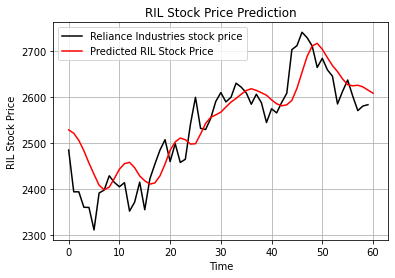

In [36]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'black', label = 'Reliance Industries stock price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted RIL Stock Price')
plt.title('RIL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('RIL Stock Price')
plt.grid('True')
plt.legend()
plt.show()

### Prediction for the current date (22nd December 2022)

In [35]:
predicted_stock_price[-1]

array([2608.993], dtype=float32)

Actual Value :RIL Rs 2598 (9:15 AM IST 22nd December 2022)

Predicted Value : Rs 2609

Error : 0.42%